# **32161314 김호준 현대예측론 중간과제**

**Python scikit-learn 선형회귀(Linear-Regression) 모델**을 이용한 전국 대학교 입학생 수 예측



# **Contents**


##**1. 서론** 

>1.1 연구 배경

>1.2 연구 목적 

##**2. 이론적 배경**

>2.1 머신러닝

>> 2.1.1 sk-learn 라이브러리를 이용한 회귀모델

##**3. 연구방법**

> 3.1 연도별 대학교 입학자 수 회귀모델 생성

> > 3.1.1 데이터 전처리

>>> 1) 연도별 총입학 정원 데이터 추출

> >> 2) 연도별 대학교 입학정원 데이터 추출

>> >3) 연도별 고등학교 졸업인원 데이터 추출

>> >4) 연도별 대학교 재학생 수 데이터 추출

>> >5) 연도별 대학교 졸업생 수 데이터 추출

> >>6) 연도별 전국 대학교 수 데이터 추출

> >>7) 연도별 전국 대학교 학과 수 데이터 추출

> >>8) 데이터 병합

> >>9) 결측치 및 이상치 제거

> >>10) 데이터 정규화

> >>11) 데이터 표준화

>> 3.1.2 회귀모델 설계

##**4. 조사결과**

>4.1 대학교 입학자 수 회귀모델을 통한 예측

>4.2 대학교 입학자 수 회귀분석 모델 평가

>> 4.2.1 피처 유의성 검정

>> 4.2.2 다중공선성

>> 3.2.3 L2 규제 평가(릿지[Ridge])

<br>

##**5. 결과 고찰 및 개선 방안**

<br>

##**6. 결론**

<br>

---

**참고문헌**

1) 교육통계서비스: https://kess.kedi.re.kr/index  

>연도별 학교수

>연도별 학과수

>연도별 재적학생수

>연도별 학년별 재적학생수

>연도별 입학정원

>연도별 입학자수

>연도별 졸업자수

2) 파이썬 머신러닝 완벽 가이드(권철민)

3) 테디노트 깃허브 : https://github.com/teddylee777/machine-learning

연도에 따른 대학교 입학자 수 회귀분석



2.1.1 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1) 연도별 대학교 총입학 정원 데이터 추출


In [3]:
num_ad = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 입학자수.xlsx') 

In [4]:
num_ad.head()

,연도,시도,입학자수,입학자수.1,전문대학,전문대학.1,교육대학,교육대학.1,일반대학,일반대학.1,방송통신대학,방송통신대학.1,산업대학,산업대학.1,기술대학,기술대학.1,각종학교,각종학교.1,원격및사이버대학,원격및사이버대학.1,사내대학,사내대학.1,전공대학,전공대학.1,기능대학,기능대학.1,대학원,대학원.1,대학원.2,대학원.3,대학원.4,대학원.5
0,연도,시도,입학자수,입학자수,전문대학,전문대학,교육대학,교육대학,일반대학,일반대학,방송통신대학,방송통신대학,산업대학,산업대학,기술대학,기술대학,각종학교,각종학교,원격및사이버대학,원격및사이버대학,사내대학,사내대학,전공대학,전공대학,기능대학,기능대학,계,계,석사,석사,박사,박사
1,연도,시도,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여
2,1999,전체,795998,356583,306802,147553,4840,3715,319278,137967,49648,29495,30882,8572,NaN,NaN,275,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84273,29183,73826,26647,10447,2536
3,2000,전체,819779,381957,318135,158102,5075,3719,321399,145611,47387,28914,33240,9860,100,7,364,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94079,35586,82374,32487,11705,3099
4,2001,전체,839516,393342,322687,160023,4959,3620,327031,148434,50949,31151,33870,10465,100,8,358,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99562,39484,86992,35937,12570,3547


In [5]:
num_ad1 = num_ad.copy()

In [6]:
nu = num_ad1.iloc[2:24 , [0,2]]

In [7]:
nu = nu.reset_index()

In [8]:
nu = nu.drop('index',axis=1)

In [9]:
nu = nu.astype('int')

In [10]:
nu  # 연도별 입학자수 (22,2) 데이터프레임 생성완료 

,연도,입학자수
0,1999,795998
1,2000,819779
2,2001,839516
3,2002,819052
4,2003,776291
5,2004,773741
6,2005,769034
7,2006,775605
8,2007,786757
9,2008,786003


2) 연도별 대학교 입학정원 데이터 추출

In [11]:
num_ag = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 입학정원.xlsx') 

In [12]:
num_ag.head()

,연도,시도,학과수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,대학원,대학원.1,대학원.2
0,연도,시도,학과수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,계,석사,박사
1,1999,전체,807451,294250,4285,311240,66400,31065,NaN,760,NaN,NaN,NaN,NaN,99451,87485,11966
2,2000,전체,820666,294175,4735,314410,66400,32955,100,500,NaN,NaN,NaN,NaN,107391,94339,13052
3,2001,전체,827473,292035,4735,316780,66400,33220,100,500,NaN,NaN,NaN,NaN,113703,99524,14179
4,2002,전체,842866,293174,4855,324309,66400,34445,100,500,NaN,NaN,NaN,NaN,119083,103605,15478


In [13]:
ng = num_ag.loc[1:22,'학과수']

In [14]:
ng = ng.reset_index()

In [15]:
ng = ng.drop('index',axis = 1)

In [16]:
ng #입학정원 데이터 추출 완료

,학과수
0,807451
1,820666
2,827473
3,842866
4,843693
5,856976
6,838582
7,800920
8,787035
9,788806


In [17]:
df = pd.concat([nu,ng], axis = 1)

In [18]:
df = df.rename(columns={'학과수':'입학정원'})

In [19]:
df # 초기병합 완료

,연도,입학자수,입학정원
0,1999,795998,807451
1,2000,819779,820666
2,2001,839516,827473
3,2002,819052,842866
4,2003,776291,843693
5,2004,773741,856976
6,2005,769034,838582
7,2006,775605,800920
8,2007,786757,787035
9,2008,786003,788806


3) 연도별 고등학교 졸업인원 데이터 추출

In [20]:
num_hg = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 초중고 졸업자.xlsx') 

In [21]:
num_hg.head()

,연도,시도,계,계.1,유치원,유치원.1,초등학교,초등학교.1,중학교,중학교.1,고등학교,고등학교.1,고등학교.2,고등학교.3,고등학교.4,고등학교.5,고등학교.6,고등학교.7,고등학교.8,고등학교.9,고등학교.10,고등학교.11,고등학교.12,고등학교.13,특수학교,특수학교.1,공민학교,공민학교.1,고등공민,고등공민.1,고등기술학교,고등기술학교.1,각종학교,각종학교.1
0,연도,시도,계,계,유치원,유치원,초등학교,초등학교,중학교,중학교,계,계,일반계고,일반계고,전문계고,전문계고,일반고,일반고,특목고,특목고,특성화고,특성화고,자율고,자율고,특수학교,특수학교,공민학교,공민학교,고등공민,고등공민,고등기술학교,고등기술학교,각종학교,각종학교
1,연도,시도,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자,전체,여자
2,1999,전국,2493983,1195841,398807,186986,618438,296152,715971,344592,747723,361624,456831,213503,290892,148121,0,0,0,0,0,0,0,0,6864,2532,20,20,160,138,3731,2361,2269,1436
3,2000,전국,2418103,1154090,392441,182085,614759,293834,631398,301726,764712,370076,473665,224970,291047,145106,0,0,0,0,0,0,0,0,7171,2583,14,14,127,103,4034,2088,3447,1581
4,2001,전국,2391416,1140149,399506,188200,614917,291040,626507,299427,735739,355306,465346,221358,270393,133948,0,0,0,0,0,0,0,0,7547,2796,36,36,63,48,3092,1626,4009,1670


In [22]:
nh = num_hg.loc[2:23,'고등학교']

In [23]:
nh = nh.reset_index(drop=True)

In [24]:
nh

0     747723
1     764712
2     735739
3     670713
4     590413
5     588550
6     569272
7     568055
8     571357
9     581921
10    576298
11    633539
12    648468
13    636724
14    631197
15    632983
16    615462
17    607598
18    583608
19    566545
20    568736
21    500373
Name: 고등학교, dtype: object

4) 연도별 대학교 재학생 수 데이터 추출

In [25]:
num_in = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 재적학생수.xlsx') 

In [26]:
num_in.head()

,연도,시도,재적학생수,재적학생수.1,전문대학,전문대학.1,교육대학,교육대학.1,일반대학,일반대학.1,방송통신대학,방송통신대학.1,산업대학,산업대학.1,기술대학,기술대학.1,각종학교,각종학교.1,원격및사이버대학,원격및사이버대학.1,사내대학,사내대학.1,전공대학,전공대학.1,기능대학,기능대학.1,대학원,대학원.1,대학원.2,대학원.3,대학원.4,대학원.5
0,연도,시도,재적학생수,재적학생수,전문대학,전문대학,교육대학,교육대학,일반대학,일반대학,방송통신대학,방송통신대학,산업대학,산업대학,기술대학,기술대학,각종학교,각종학교,원격및사이버대학,원격및사이버대학,사내대학,사내대학,전공대학,전공대학,기능대학,기능대학,계,계,석사,석사,박사,박사
1,연도,시도,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여
2,1999,전체,3154245,1189103,859547,319687,21323,15532,1587667,559836,316365,190806,158444,34619,NaN,NaN,6126,2094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204773,66529,175849,59635,28924,6894
3,2000,전체,3363549,1286762,913273,339233,20907,15032,1665398,596389,360051,216741,170622,38232,100,7,3761,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229437,80072,197436,72177,32001,7895
4,2001,전체,3500560,1350523,952649,351080,21418,15178,1729638,626982,370661,222982,180068,41902,198,15,2658,707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243270,91677,209865,82936,33405,8741


In [27]:
ni = num_in.loc[2:23,'재적학생수']

In [28]:
ni

2     3154245
3     3363549
4     3500560
5     3577447
6     3531721
7     3555115
8     3548728
9     3545774
10    3558711
11    3562844
12    3591088
13    3644158
14    3735706
15    3728802
16    3709734
17    3668747
18    3608071
19    3516607
20    3437309
21    3378393
22    3326733
23    3276327
Name: 재적학생수, dtype: object

In [29]:
ni = ni.reset_index(drop=True)

5) 연도별 대학교 졸업생 수 데이터 추출

In [30]:
num_ed = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 졸업자수.xlsx') 

In [31]:
num_ed.head()

,연도,시도,졸업자수,졸업자수.1,전문대학,전문대학.1,교육대학,교육대학.1,일반대학,일반대학.1,방송통신대학,방송통신대학.1,산업대학,산업대학.1,기술대학,기술대학.1,각종학교,각종학교.1,원격및사이버대학,원격및사이버대학.1,사내대학,사내대학.1,전공대학,전공대학.1,기능대학,기능대학.1,대학원,대학원.1,대학원.2,대학원.3,대학원.4,대학원.5
0,연도,시도,졸업자수,졸업자수,전문대학,전문대학,교육대학,교육대학,일반대학,일반대학,방송통신대학,방송통신대학,산업대학,산업대학,기술대학,기술대학,각종학교,각종학교,원격및사이버대학,원격및사이버대학,사내대학,사내대학,전공대학,전공대학,기능대학,기능대학,계,계,석사,석사,박사,박사
1,연도,시도,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여,계,여
2,1999,전체,511984,247932,212726,115774,5106,4196,204390,93700,18986,12796,21535,6433,NaN,NaN,2173,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47068,13961,41482,12817,5586,1144
3,2000,전체,542184,267951,223489,124037,5233,4126,214498,100925,22477,15513,21266,6245,0,0,1854,876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53367,16229,47226,14971,6141,1258
4,2001,전체,584340,289084,232972,130471,5195,4007,239702,112443,21512,15344,24389,6842,0,0,1240,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59330,19514,53109,18034,6221,1480


In [32]:
ne = num_ed.loc[2:23,'졸업자수']

In [33]:
ne

2     511984
3     542184
4     584340
5     603281
6     633730
7     627270
8     634523
9     638259
10    642987
11    681758
12    636628
13    628689
14    653118
15    665057
16    657013
17    667056
18    680698
19    685089
20    678845
21    660772
22    653388
23    666083
Name: 졸업자수, dtype: object

In [34]:
ne = ne.reset_index(drop=True)

6) 연도별 전국 대학교 수 데이터 추출

In [35]:
num_co = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 학교수.xlsx') 

In [36]:
num_co.head()

,연도,시도,학교수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,대학원,대학원.1
0,연도,시도,학교수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,대학원대학,부설대학원
1,1999,전체,368,161,11,158,1,19,NaN,4,NaN,NaN,NaN,NaN,14,(662)
2,2000,전체,372,158,11,161,1,19,1,4,NaN,NaN,NaN,NaN,17,(812)
3,2001,전체,374,158,11,162,1,19,1,4,NaN,NaN,NaN,NaN,18,(887)
4,2002,전체,376,159,11,163,1,19,1,4,NaN,NaN,NaN,NaN,18,(927)


In [37]:
nc = num_co.loc[1:22,'학교수']

In [38]:
nc

1     368
2     372
3     374
4     376
5     388
6     411
7     419
8     412
9     408
10    405
11    407
12    411
13    431
14    429
15    430
16    430
17    431
18    430
19    430
20    430
21    430
22    429
Name: 학교수, dtype: object

In [39]:
nc = nc.reset_index(drop=True)

7) 연도별 전국 대학교 학과 수 데이터 추출

In [40]:
num_mj = pd.read_excel('/content/drive/MyDrive/현대예측론 중간과제/2020_연도별 학과수.xlsx') 

In [41]:
num_mj.head()

,연도,시도,학과수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,대학원,대학원.1,대학원.2
0,연도,시도,학과수,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격및사이버대학,사내대학,전공대학,기능대학,계,석사,박사
1,1999,전체,22579,4464,14,8854,18,908,NaN,91,NaN,NaN,NaN,NaN,8230,6236,1994
2,2000,전체,25083,4835,14,9377,19,1021,2,73,NaN,NaN,NaN,NaN,9742,7330,2412
3,2001,전체,26584,5110,13,9723,19,1103,2,67,NaN,NaN,NaN,NaN,10547,7880,2667
4,2002,전체,27256,5200,12,9659,19,1079,2,55,NaN,NaN,NaN,NaN,11230,8283,2947


In [42]:
nm = num_mj.loc[1:22,'학과수']

In [43]:
nm

1     22579
2     25083
3     26584
4     27256
5     27834
6     29175
7     30397
8     32177
9     32697
10    32798
11    33012
12    33415
13    33809
14    34496
15    34522
16    34084
17    34764
18    34290
19    34740
20    34070
21    33988
22    34054
Name: 학과수, dtype: object

In [44]:
nm = nm.reset_index(drop=True)

8) 데이터 병합

In [45]:
df = pd.concat([df,nh], axis = 1)

In [46]:
df = pd.concat([df,ni], axis = 1)

In [47]:
df = pd.concat([df,ne], axis = 1)

In [48]:
df = pd.concat([df,nc], axis = 1)

In [49]:
df = pd.concat([df,nm], axis = 1)

In [50]:
df # 병합완료

,연도,입학자수,입학정원,고등학교,재적학생수,졸업자수,학교수,학과수
0,1999,795998,807451,747723,3154245,511984,368,22579
1,2000,819779,820666,764712,3363549,542184,372,25083
2,2001,839516,827473,735739,3500560,584340,374,26584
3,2002,819052,842866,670713,3577447,603281,376,27256
4,2003,776291,843693,590413,3531721,633730,388,27834
5,2004,773741,856976,588550,3555115,627270,411,29175
6,2005,769034,838582,569272,3548728,634523,419,30397
7,2006,775605,800920,568055,3545774,638259,412,32177
8,2007,786757,787035,571357,3558711,642987,408,32697
9,2008,786003,788806,581921,3562844,681758,405,32798


9) 결측치 및 이상치 제거

In [51]:
df.info() #확인 결과 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      22 non-null     int64 
 1   입학자수    22 non-null     int64 
 2   입학정원    22 non-null     object
 3   고등학교    22 non-null     object
 4   재적학생수   22 non-null     object
 5   졸업자수    22 non-null     object
 6   학교수     22 non-null     object
 7   학과수     22 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.5+ KB


In [52]:
df = df.astype('int') # 데이터 프레임 정수형으로 변환

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      22 non-null     int64
 1   입학자수    22 non-null     int64
 2   입학정원    22 non-null     int64
 3   고등학교    22 non-null     int64
 4   재적학생수   22 non-null     int64
 5   졸업자수    22 non-null     int64
 6   학교수     22 non-null     int64
 7   학과수     22 non-null     int64
dtypes: int64(8)
memory usage: 1.5 KB


10) 데이터 정규화

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
min_max_scaler = MinMaxScaler()

In [56]:
df = min_max_scaler.fit_transform(df)

In [57]:
pd.DataFrame(df, columns=['연도',	'입학자수',	'입학정원',	'고등학교졸업자수',	'재적학생수','졸업자수','학교수','학과수'])

,연도,입학자수,입학정원,고등학교졸업자수,재적학생수,졸업자수,학교수,학과수
0,0.000000,0.613294,0.654363,0.935730,0.000000,0.000000,0.000000,0.000000
1,0.047619,0.824615,0.746591,1.000000,0.359962,0.174461,0.063492,0.205499
2,0.095238,1.000000,0.794097,0.890395,0.595595,0.417989,0.095238,0.328683
3,0.142857,0.818154,0.901526,0.644400,0.727825,0.527408,0.126984,0.383833
4,0.190476,0.438175,0.907297,0.340623,0.649185,0.703307,0.317460,0.431268
5,0.238095,0.415515,1.000000,0.333575,0.689419,0.665989,0.682540,0.541321
6,0.285714,0.373688,0.871627,0.260646,0.678434,0.707888,0.809524,0.641609
7,0.333333,0.432079,0.608782,0.256042,0.673354,0.729471,0.698413,0.787690
8,0.380952,0.531177,0.511878,0.268534,0.695603,0.756783,0.634921,0.830365
9,0.428571,0.524477,0.524238,0.308498,0.702711,0.980757,0.587302,0.838654


11) 데이터 표준화

In [58]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [59]:
df = standard_scaler.fit_transform(df)

In [60]:
df = pd.DataFrame(df, columns=['연도',	'입학자수',	'입학정원',	'고등학교졸업자수',	'재적학생수','졸업자수','학교수','학과수'])

In [61]:
df

,연도,입학자수,입학정원,고등학교졸업자수,재적학생수,졸업자수,학교수,학과수
0,-1.655032,0.385587,0.481757,2.045767,-2.532927,-2.925015,-2.013115,-2.580559
1,-1.497410,1.131603,0.799667,2.313125,-1.097789,-2.223207,-1.827614,-1.866507
2,-1.339788,1.750758,0.963421,1.857174,-0.158343,-1.243557,-1.734863,-1.438475
3,-1.182166,1.108797,1.333725,0.833852,0.368849,-0.803393,-1.642112,-1.246844
4,-1.024544,-0.232626,1.353620,-0.429838,0.055319,-0.095798,-1.085607,-1.082019
5,-0.866921,-0.312620,1.673165,-0.459156,0.215725,-0.245920,-0.018972,-0.699613
6,-0.709299,-0.460280,1.230666,-0.762536,0.171931,-0.077370,0.352032,-0.351141
7,-0.551677,-0.254146,0.324643,-0.781688,0.151677,0.009450,0.027404,0.156452
8,-0.394055,0.095695,-0.009384,-0.729724,0.240382,0.119322,-0.158098,0.304737
9,-0.236433,0.072042,0.033220,-0.563477,0.268721,1.020309,-0.297224,0.333539


2.1.2 회귀모델 설계

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('입학자수', 1), df['입학자수'])

In [64]:
x_train.shape, x_test.shape

((16, 7), (6, 7))

In [65]:
x_train.head()

,연도,입학정원,고등학교졸업자수,재적학생수,졸업자수,학교수,학과수
7,-0.551677,0.324643,-0.781688,0.151677,0.009450,0.027404,0.156452
3,-1.182166,1.333725,0.833852,0.368849,-0.803393,-1.642112,-1.246844
9,-0.236433,0.033220,-0.563477,0.268721,1.020309,-0.297224,0.333539
21,1.655032,-1.773823,-1.846807,-1.695845,0.656043,0.815786,0.691706
6,-0.709299,1.230666,-0.762536,0.171931,-0.077370,0.352032,-0.351141


In [66]:
y_train.head()

7    -0.254146
3     1.108797
9     0.072042
21   -1.779493
6    -0.460280
Name: 입학자수, dtype: float64

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
import matplotlib.pyplot as plt  # 테디 깃허브 출처 메소드
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression(n_jobs=-1)

In [71]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [72]:
x_test

,연도,입학정원,고등학교졸업자수,재적학생수,졸업자수,학교수,학과수
16,0.866921,-0.705200,-0.035639,0.578829,0.995676,0.908537,0.894173
4,-1.024544,1.353620,-0.429838,0.055319,-0.095798,-1.085607,-1.082019
19,1.339788,-1.581658,-0.805451,-0.996008,0.532622,0.862161,0.696269
14,0.551677,-0.352409,0.211985,1.275904,0.445268,0.862161,0.825163
20,1.497410,-1.670331,-0.770971,-1.350226,0.361028,0.862161,0.672885
0,-1.655032,0.481757,2.045767,-2.532927,-2.925015,-2.013115,-2.580559


3.1 대학교 입학자 수 회귀모델을 통한 예측

In [87]:
pred = model.predict(df.drop('입학자수', 1))

In [94]:
pred[:22]

array([ 0.21055477,  1.18913416,  1.43601575,  1.3492671 ,  0.10233702,
       -0.21242412, -0.44576754, -0.12835411,  0.10052904, -0.26051597,
        0.42415625,  1.09436825,  1.03340046,  0.88166318,  0.97598122,
        0.55134117, -0.0067232 , -0.59708539, -1.10436031, -1.26218675,
       -1.49843405, -2.2202373 ])

3.2 대학교 입학자 수 회귀분석 모델 평가


3.2.1 피쳐 유의성 검정

In [ ]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   입학자수   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     14.37
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           0.000594
Time:                        05:16:15   Log-Likelihood:                -1.1977
No. Observations:                  16   AIC:                             18.40
Df Residuals:                       8   BIC:                             24.58
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.095      0.616      0.555      -0.160       0.277
연도             0.1563      0.555      0.282      0.785      -1.123       1.435
입학정원           0.8098      0.807      1.004      0.345      -1.051       2.670
고등학교졸업자수       0.7625      0.345      2.212      0.058      -0.033       1.558
재적학생수         -0.0400      0.601     -0.067      0.949      -1.427       1.346
졸업자수          -0.4050      0.277     -1.463      0.182      -1.043       0.233
학교수           -0.7671      0.382     -2.007      0.080      -1.649       0.114
학과수            1.6129      1.033      1.562      0.157      -0.769       3.994
==============================================================================
Omnibus:                        8.648   Durbin-Watson:                   2.533
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.367
Skew:                           1.304   Prob(JB):                       0.0683
Kurtosis:                       4.118   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*3.2*.2 다중공선성


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif.round(1)

,VIF Factor,features
0,1.1,const
1,34.9,연도
2,79.8,입학정원
3,13.0,고등학교졸업자수
4,43.7,재적학생수
5,8.4,졸업자수
6,16.8,학교수
7,125.0,학과수


3.2.3 L2 규제 평가(릿지[Ridge])

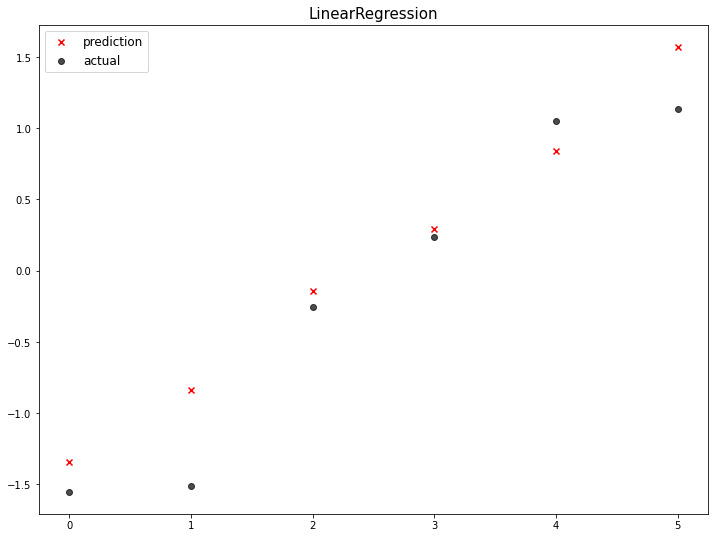

              model       mse
0  LinearRegression  0.125227


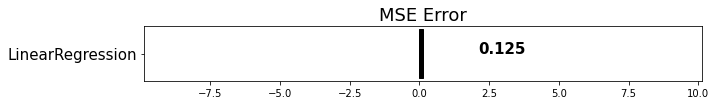

In [ ]:
mse_eval('LinearRegression', pred, y_test)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

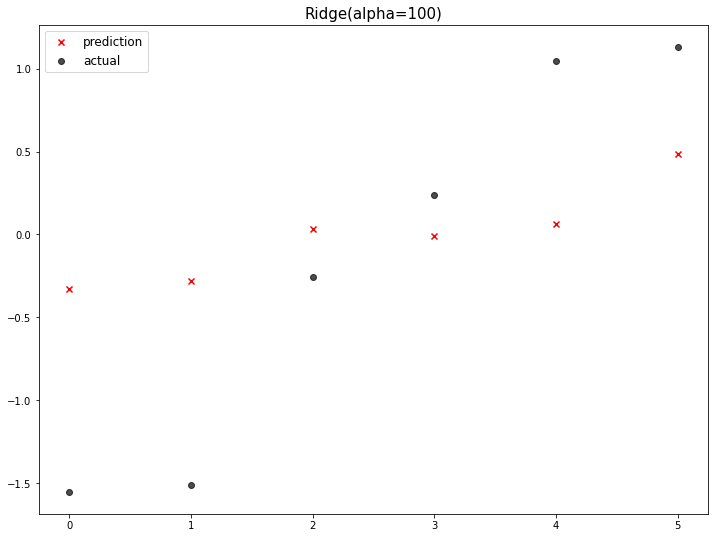

              model       mse
0  Ridge(alpha=100)  0.754813
1  LinearRegression  0.125227


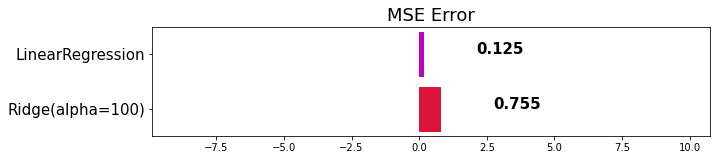

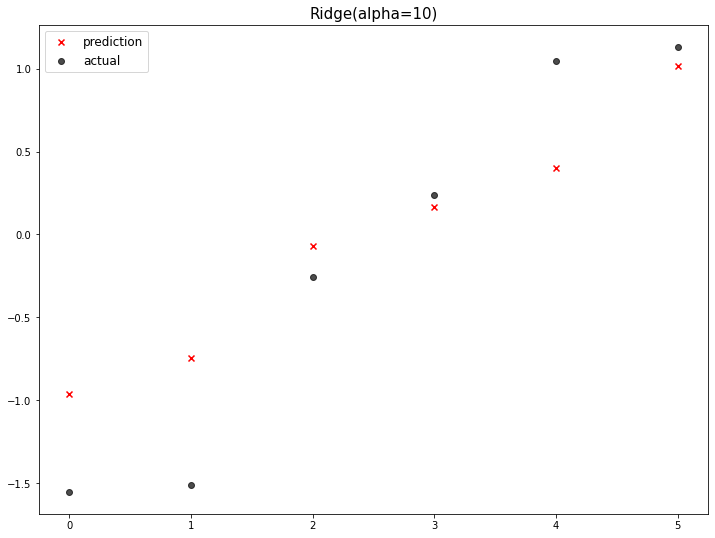

              model       mse
0  Ridge(alpha=100)  0.754813
1   Ridge(alpha=10)  0.234411
2  LinearRegression  0.125227


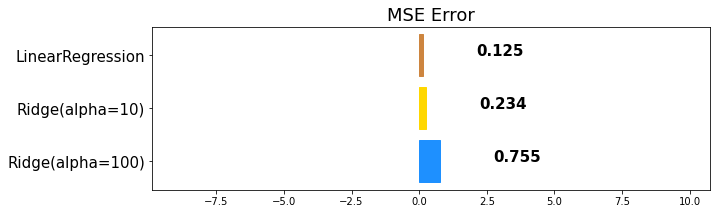

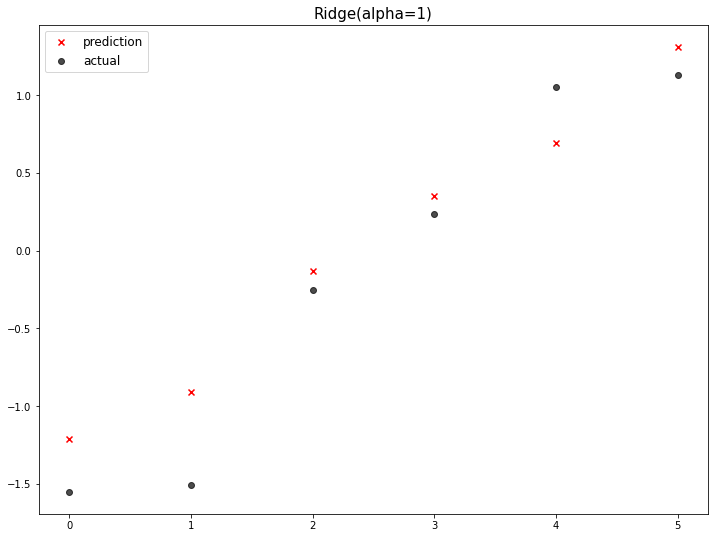

              model       mse
0  Ridge(alpha=100)  0.754813
1   Ridge(alpha=10)  0.234411
2  LinearRegression  0.125227
3    Ridge(alpha=1)  0.109837


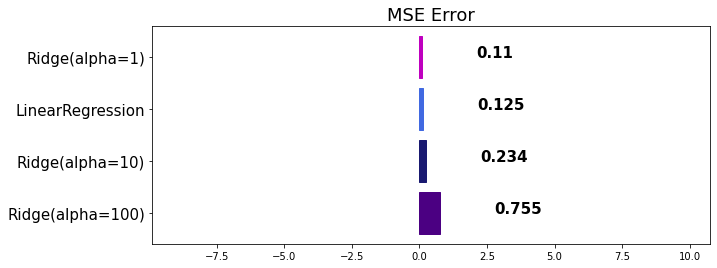

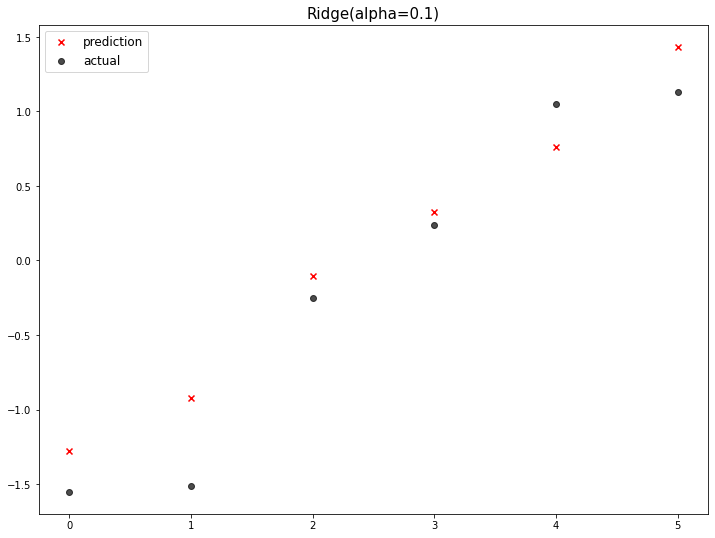

              model       mse
0  Ridge(alpha=100)  0.754813
1   Ridge(alpha=10)  0.234411
2  LinearRegression  0.125227
3    Ridge(alpha=1)  0.109837
4  Ridge(alpha=0.1)  0.103030


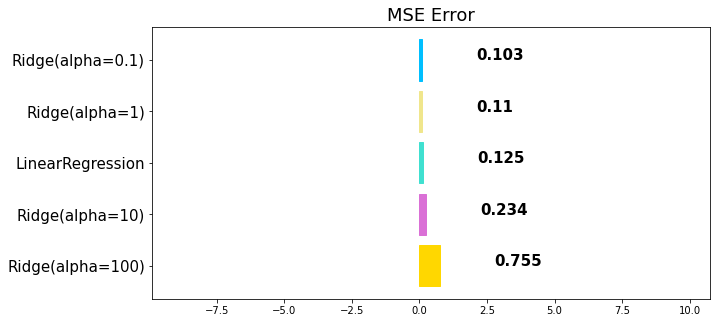

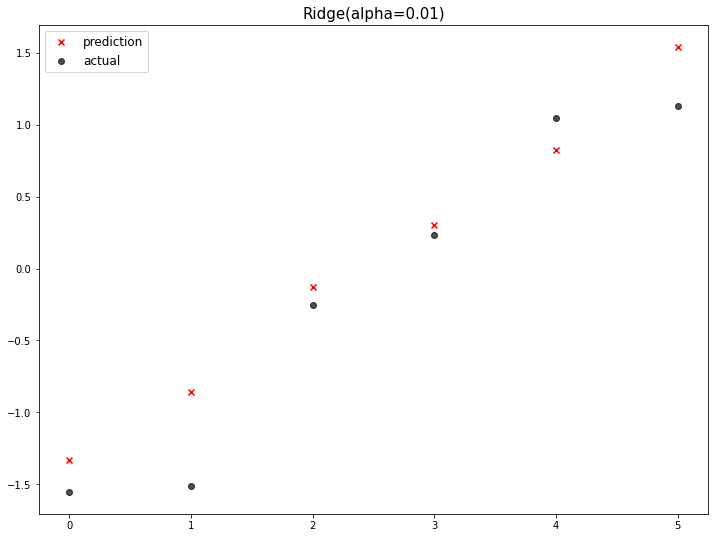

               model       mse
0   Ridge(alpha=100)  0.754813
1    Ridge(alpha=10)  0.234411
2   LinearRegression  0.125227
3  Ridge(alpha=0.01)  0.118856
4     Ridge(alpha=1)  0.109837
5   Ridge(alpha=0.1)  0.103030


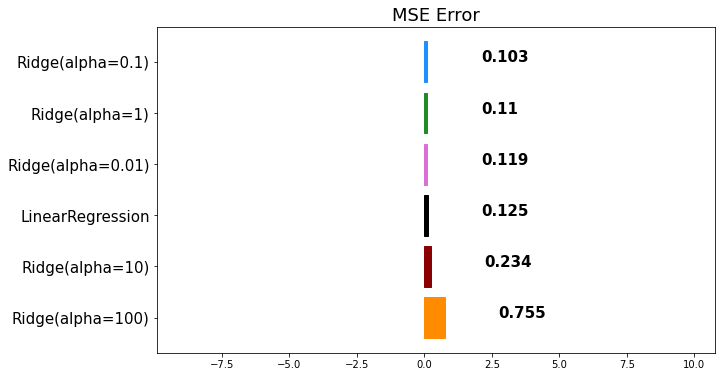

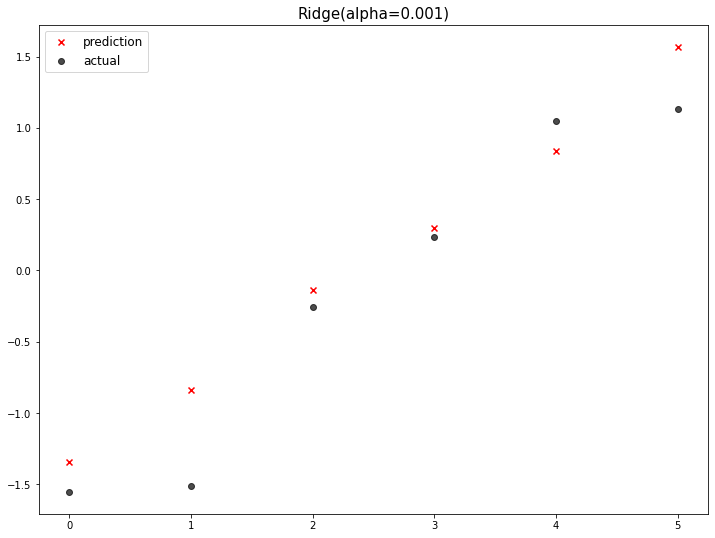

                model       mse
0    Ridge(alpha=100)  0.754813
1     Ridge(alpha=10)  0.234411
2    LinearRegression  0.125227
3  Ridge(alpha=0.001)  0.124462
4   Ridge(alpha=0.01)  0.118856
5      Ridge(alpha=1)  0.109837
6    Ridge(alpha=0.1)  0.103030


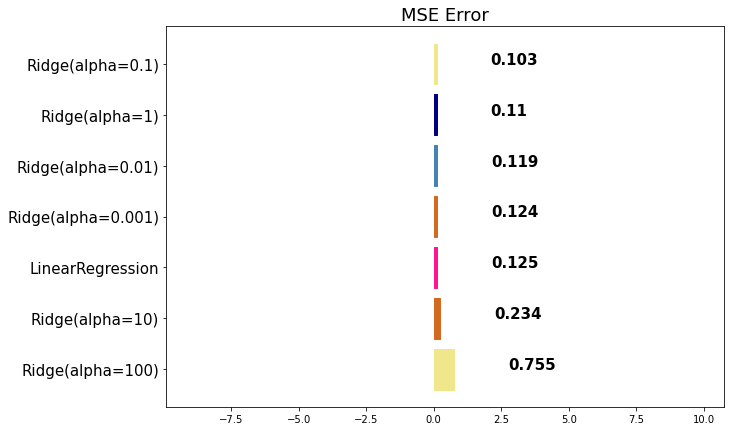

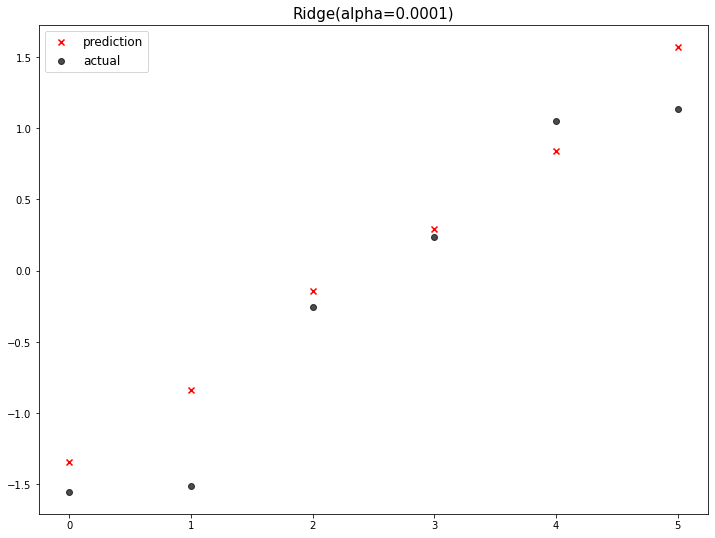

                 model       mse
0     Ridge(alpha=100)  0.754813
1      Ridge(alpha=10)  0.234411
2     LinearRegression  0.125227
3  Ridge(alpha=0.0001)  0.125149
4   Ridge(alpha=0.001)  0.124462
5    Ridge(alpha=0.01)  0.118856
6       Ridge(alpha=1)  0.109837
7     Ridge(alpha=0.1)  0.103030


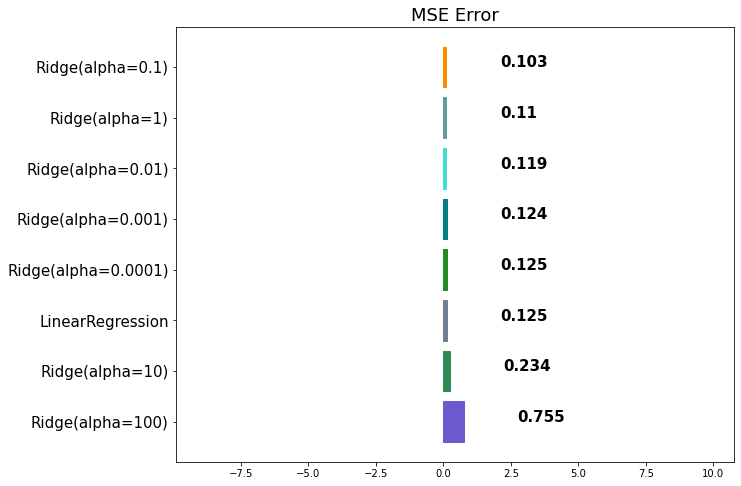

In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)